<a href="https://www.kaggle.com/code/gomugomu781/skripsi-lstm?scriptVersionId=157433537" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datalaundry/master_data.csv
/kaggle/input/datalaundry/datapenjualan.csv
/kaggle/input/datalaundry/datapenjualan2022.csv


In [2]:
data = pd.read_csv('/kaggle/input/datalaundry/master_data.csv')
df = pd.DataFrame(data) 
df.head()

,Hari,Tanggal,Cuci_Setrika,Setrika,Cuci,Total_Pendapatan
0,Friday,1/1/2021,87.4,29.16,40.5,960000.0
1,Saturday,1/2/2021,105.0,45.50,17.5,1050000.0
2,Sunday,1/3/2021,112.6,52.36,20.0,1150000.0
3,Monday,1/4/2021,36.0,30.98,6.0,437000.0
4,Tuesday,1/5/2021,48.1,29.66,19.8,584000.0


In [3]:
hp=df.iloc[0][1]
ht=df.iloc[-1][1]
print('Jumlah hari dalam dataset : ', df.shape[0])
print('Hari pertama : ', hp)
print('Hari terakhir : ', ht)

Jumlah hari dalam dataset :  939
Hari pertama :  1/1/2021
Hari terakhir :  7/28/2023


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Hari              939 non-null    object 
 1   Tanggal           939 non-null    object 
 2   Cuci_Setrika      939 non-null    float64
 3   Setrika           939 non-null    float64
 4   Cuci              939 non-null    float64
 5   Total_Pendapatan  939 non-null    float64
dtypes: float64(4), object(2)
memory usage: 44.1+ KB


In [5]:
df.describe()

,Cuci_Setrika,Setrika,Cuci,Total_Pendapatan
count,939.000000,939.000000,939.000000,9.390000e+02
mean,93.638126,44.582684,21.592055,9.857653e+05
std,43.406868,19.771258,11.768338,3.410041e+05
min,20.100000,0.000000,0.000000,2.040000e+05
25%,65.800000,30.000000,12.600000,7.805000e+05
50%,81.500000,43.200000,20.500000,9.320000e+05
75%,110.350000,58.350000,29.900000,1.118950e+06
max,426.400000,143.500000,86.800000,3.215500e+06


In [6]:
df.shape

(939, 6)

In [7]:
totalpendapatandf = df[['Tanggal','Hari','Cuci_Setrika','Setrika','Cuci','Total_Pendapatan']]
total_pen_data = totalpendapatandf.copy()
print('Data yang akan diprediksi : ', total_pen_data.shape[0])

Data yang akan diprediksi :  939


In [8]:
total_pen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tanggal           939 non-null    object 
 1   Hari              939 non-null    object 
 2   Cuci_Setrika      939 non-null    float64
 3   Setrika           939 non-null    float64
 4   Cuci              939 non-null    float64
 5   Total_Pendapatan  939 non-null    float64
dtypes: float64(4), object(2)
memory usage: 44.1+ KB


In [9]:
from sklearn.preprocessing import MinMaxScaler

data_pred = total_pen_data.drop(columns=['Tanggal', 'Hari'], axis=1)
scaler = MinMaxScaler(feature_range=(0,1))
data_pred = scaler.fit_transform(np.array(data_pred).reshape(-1,1))
data_pred.shape

(3756, 1)

In [10]:
training_size = int(len(data_pred)*0.80)
test_size=len(data_pred)-training_size
train_data, test_data = data_pred[0:training_size,:],data_pred[training_size:len(data_pred),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (3004, 1)
test_data:  (752, 1)


In [11]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (2988, 15)
y_train:  (2988,)
X_test:  (736, 15)
y_test (736,)


In [13]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (2988, 15, 1)
X_test:  (736, 15, 1)


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [15]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [16]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
94/94 [==============================] - 3s 10ms/step - loss: 0.0195 - val_loss: 0.0246
Epoch 2/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0169 - val_loss: 0.0227
Epoch 3/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0155 - val_loss: 0.0205
Epoch 4/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0146 - val_loss: 0.0204
Epoch 5/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0142 - val_loss: 0.0207
Epoch 6/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0140 - val_loss: 0.0189
Epoch 7/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0137 - val_loss: 0.0194
Epoch 8/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0135 - val_loss: 0.0184
Epoch 9/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0132 - val_loss: 0.0178
Epoch 10/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0130 - val_loss: 0.0183
Epoch 11/50
94/94 

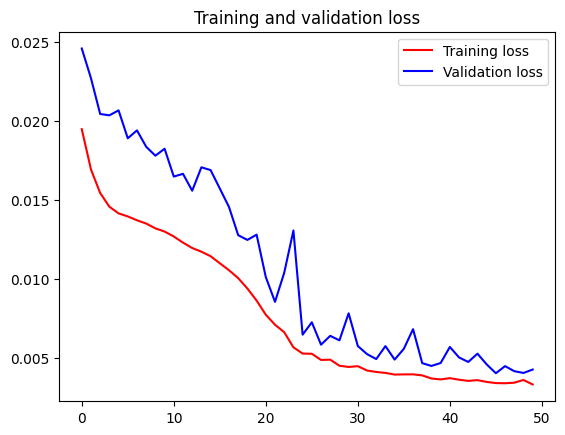

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [18]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

23/23 [==============================] - 0s 3ms/step


((2988, 1), (736, 1))

In [19]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [20]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

In [21]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  184746.54173935344
Train data MSE:  34131284684.650665
Train data MAE:  102130.52694763118
-------------------------------------------------------------------------------------
Test data RMSE:  210640.8746924147
Test data MSE:  44369578091.185555
Test data MAE:  118501.22338231957


In [22]:
rmse = np.sqrt(np.mean((X_train - y_test)**2))
print(f'{rmse:.4f}')

0.2125


In [23]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8280567635399201
Test data explained variance regression score: 0.8434826576337061
